# Исследование по данным игры Dota2
## Часть 1
## Загрузка необходимых библиотек

Для работы нам понадобятся библиотеки:

- **pandas**: при помощи нее мы считаем из файла таблицу с данными  
- **sklearn**: библиотека для машинного обучения, из нее нам понадобится модуль **tree** для работы с решающими деревьями
- **matplotlib**: библиотека для визуализации данных
- **seaborn**: по сути matplotlib на максималках - позволяет легко делать сложные визуализации

In [1]:
# Подключаем нужные библиотеки

import pandas as pd
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Загружаем данные при помощи библиотеки `pandas`

В файле `dota2_skill_train.csv` содержатся данные о матчах, показателях игрока и показателях за последние 16 матчей 
почти по 100,000 игроков в Dota2

In [2]:
# Для чтения данных используем метод read_csv

table = pd.read_csv('dota2_skill_train.csv', index_col='id')

Посмотреть на первые строчки таблицы можно при помощи метода `head():`

In [3]:
# Вызываем метод head у объекта table

table.tail()

,skilled,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,...,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak
id,,,,,,,,,,,,,,,,,,,,,
193401,0,radiant,radiant,1983,90,301,0,70,10,0,...,3,8,436,518,28,19,617,718,4,4
193403,1,radiant,dire,2268,90,0,0,36,7,0,...,8,12,496,591,23,29,744,838,0,5
193404,0,dire,dire,2426,90,70,1,48,4,0,...,6,12,556,573,30,31,819,858,1,4
193407,1,dire,radiant,2059,90,55,0,111,2,0,...,9,13,268,397,13,22,383,589,0,1
193409,1,radiant,radiant,2004,90,109,0,105,10,0,...,10,10,384,410,17,17,553,678,3,3


##### В этой таблице 57 колонок:

56 признаков и целевая переменная для этой задачи
- **skilled**: 1 (опытный игрок), 0 (новичок) 

### Формируем обучающую выборку

Алгоритмы машинного обучения получают на вход выборку, которая представлена:
- матрицей **`X`** (ее строчки соответствуют игрокам, столбцы — признакам) 
- вектором **`y`** из правильных ответов  


**Мы будем предсказывать "опытный игрок или нет" по данным о скорости зарабатывания золота (`gold_per_min`) и общей стоимости всего инвентаря героя (`net_worth`)**

In [4]:
# Берем все строки и оставляем столбцы 'net_worth' и 'gold_per_min' 
X = table.loc[:, ['net_worth', 'gold_per_min']]

# В качестве целевой переменной берем колонку skilled
y = table['skilled']

### Обучаем классификатор

Для этого необходимо:  

1. Импортировать из библиотеки нужный классификатор, в нашем случае — DecisionTreeClassifier
2. Передать его в переменную (создать объект классификатора)  
3. Указать при его создании все необходимые параметры 
4. Вызвать метод `fit` (что в переводе с английского — обучить, подстроить), передав ему обучающую выборку



In [5]:
# Создаем объект классификатора classifier с глубиной дерева 2
classifier = tree.DecisionTreeClassifier(max_depth=2)

# Обучаем классификатор на подготовленной выборке
classifier.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Построение предсказания по новым данным

После того как классификатор (`classifier`) был обучен для предсказания можно использовать его готовый метод `predict`, который принимает на вход матрицу X с новыми данными о неком игроке. 

Так как для обучения были использованы два определенных признака, новые данные должны тоже должны содержать две колонки с информацией по этим признакам: net_worth и gold_per_min 

In [6]:
# Создаем матрицу, состоящую из одной строчки и двух столбцов:
# net_worth = a
# gold_per_min = b
new_data = [[5124, 60]]

# Предсказываем опытность игрока вызывая метод predict уже обученного классификатора
prediction = classifier.predict(new_data)

# Выводим результат
print("Предсказанная метка skilled: ", prediction)

Предсказанная метка skilled:  [0]


В результате получаем вектор (список) из предсказанных ответов. 

Поскольку матрица бсодержит параметры по одному игроку, то и выходной список состоит из одного элемента.

## Часть 2
## Визуализация данных

Посмотрим еще раз на данные

In [7]:
table.head()

,skilled,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,...,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak
id,,,,,,,,,,,,,,,,,,,,,
7,1,dire,dire,2140,90,129,0,90,9,0,...,8,15,352,430,10,30,551,745,2,5
8,0,radiant,radiant,2138,90,174,0,5,5,0,...,9,19,294,425,13,37,445,717,2,12
12,0,radiant,radiant,3547,90,360,0,81,7,0,...,7,9,493,543,23,18,691,762,3,3
13,1,dire,radiant,1878,90,28,0,74,9,0,...,7,12,515,583,25,34,869,935,0,6
14,1,dire,radiant,2232,90,129,0,14,6,0,...,10,16,337,452,34,43,672,797,0,9


Очень часто важно понимать какие значения принимает признак. Для ответа на этот вопрос нам поможет [гистограмма](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0).

Гистограмма выглядит следующим образом:
- На оси **х** располагаются значения признака
- А на оси **y** - количество строк с таким значением признака

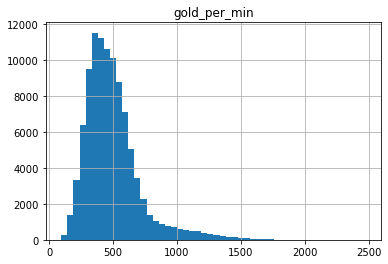

In [8]:
# Берем колонку gold_per_min - скорость зарабатывания золота
# Строим график используя метод hist датафрейма table
table.hist('gold_per_min', bins=50);

Из гистограммы видно, что скорость зарабатывания золота принимает значения больше `1500` довольно редко. Сохраним в данных только те строки, где **gold_per_min** меньше `1500`.

In [9]:
# Сделаем новую таблицу, сокращенную
table_truncated = table.query('gold_per_min < 1500')

Давайте сравним размеры нового и исходного датафреймов

In [10]:
# Для этого используем метод shape - он показывает сколько строк и столбцов содержатся в датафрейме
print("Размер table: ", table.shape)
print("Размер table_truncated: ", table_truncated.shape)

Размер table:  (99871, 57)
Размер table_truncated:  (99535, 57)


Теперь гистограмма выглядит иначе

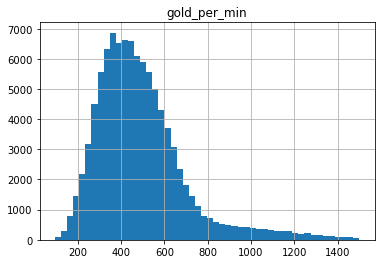

In [11]:
# Строим график методом hist нового датафрейма table_truncated
table_truncated.hist('gold_per_min', bins=50);

**Совмещение нескольких гистограмм на одном графике позволяет обнаруживать закономерности в данных.**

Например, рассмотрим показатель `gold` (число золота на момент игры), зависит ли чило золота от опыта игрока? 

Если нарисовать гистограммы `gold` для опытных игроков (голубой цвет) и для новичков (оранжевый), можно видеть существенное отличие гистограмм друг от друга, что намекает на наличие связи между опытом и количеством золота.

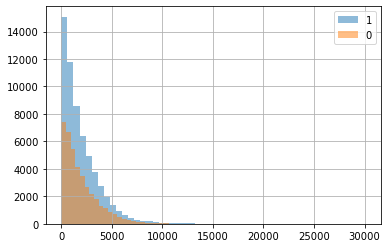

In [12]:
# Подготовим нужные выборки методом groupby
# groupby группирует данные по значениям категориальной переменной, 
# что позволяет рисовать несколько графиков на одной картинке

table_truncated.groupby('skilled')['gold'].hist(alpha=0.5, bins=50)
plt.legend(table_truncated['skilled'].unique());

Также метод groupby позволяет на ходу считать средние. Вот пример подсчета средних значений `gold` на разных уровнях категориальной переменной `skilled`.

In [13]:
table_truncated.groupby('skilled')['gold'].mean()

skilled
0    1947.379907
1    1933.366405
Name: gold, dtype: float64

Сейчас вам кажется, что они почти одинаковы. И среднее количество золота у неопытных игроков даже больше - довольно странно, не правда ли?  

И тут датасайентистам на помощь приходит **медиана** - это значение, расположенное посередине всей выборки. Половина всех возможных значений признака (в нашем случае gold) больше нее, а половина меньше. Это более информативный показатель, чем **среднее арифметическое** (mean). 

In [14]:
table_truncated.groupby('skilled')['gold'].median()

skilled
0    1398
1    1411
Name: gold, dtype: int64

Как видите, у опытных игроков "середина" имеет большее значение, чем у неопытных - что уже совсем не противоречит здравому смыслу!

### Проверим гипотезу

Поскольку герои в игре развиваются с течением времени, зарабатывая золото и опыт, естественным образом возникает вопрос:   
**"Зависит ли скорость зарабатывания золота от скорости приобретения опыта, если да, то как?"**

Чтобы ответить на этот вопрос, достаточно построить график зависимости золота от опыта. В этом нам поможет [диаграмма рассеяния](https://ru.wikipedia.org/wiki/Диаграмма_рассеяния) (eng.: Scatter Plot), которая строится следующим образом:
- Берется одна строка из таблицы данных
- Значение показателя `xp_per_min` откладывается по оси x
- Значение показателя `gold_per_min` откладывается по оси y
- В результате получается точка на плоскости
- Алгоритм повторяется для всех строк в данных

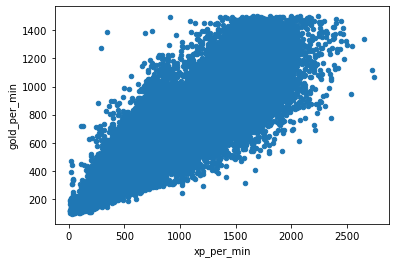

In [15]:
# Диаграмму можно легко построить с помощью встроенной функции plot библитеки pandas
table_truncated.plot(kind='scatter', x='xp_per_min', y='gold_per_min');

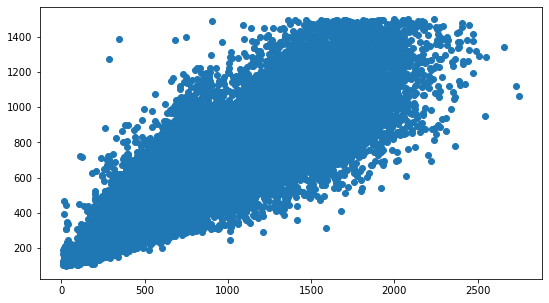

In [16]:
# Либо с помощью matplotlib:
# - figure - создает пустой холст
# - scatter - наносит точки на холст
# - show - отображает картинку

plt.figure(figsize=(9, 5))
plt.scatter(table_truncated['xp_per_min'], table_truncated['gold_per_min']);

Из графика легко видеть, что между признаками **'xp_per_min'** и **'gold_per_min'** есть зависимость, причем линейная, т.е. существует формула
$$gold = k \cdot xp + b,$$
где k и b - некоторые числовые константы.

Для того, чтобы посмотреть на взаимосвязь двух численных признаков в подробностях, у seaborn есть **joint plot** — это гибрид **scatter plot** и **histogram**. 

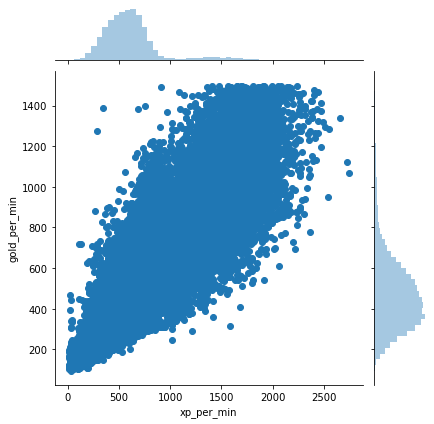

In [17]:
sns.jointplot(x='xp_per_min', y='gold_per_min', data=table_truncated);

## Часть 3
## Построение моделей

In [18]:
# Поделим данные на признаки и целевую переменную
x = table.drop(['skilled'], axis = 1)
y = table['skilled']

По традиции проверим, что все считалось корректно

In [19]:
# Выводим первые 5 строк таблицы признаков
x.head()

,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,party_players,...,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak
id,,,,,,,,,,,,,,,,,,,,,
7,dire,dire,2140,90,129,0,90,9,0,3,...,8,15,352,430,10,30,551,745,2,5
8,radiant,radiant,2138,90,174,0,5,5,0,1,...,9,19,294,425,13,37,445,717,2,12
12,radiant,radiant,3547,90,360,0,81,7,0,1,...,7,9,493,543,23,18,691,762,3,3
13,dire,radiant,1878,90,28,0,74,9,0,2,...,7,12,515,583,25,34,869,935,0,6
14,dire,radiant,2232,90,129,0,14,6,0,2,...,10,16,337,452,34,43,672,797,0,9


In [20]:
# и первые 5 строк столбца целевой переменной
y.head()

id
7     1
8     0
12    0
13    1
14    1
Name: skilled, dtype: int64

Для задач классификации, как наша, очень важно знать - сбалансированы классы или нет. Другими словами: какое соотношение объектов разных классов в обучающей выборке?

In [21]:
# Для того, чтобы это проверить, используем метод value_counts() объекта y 
y.value_counts()

0    60085
1    39786
Name: skilled, dtype: int64

Как видите, объектов класса "0" (неопытные игроки) в полтора раза больше, чем объектов класса "1" (опытные игроки). Это не самый большой дисбаланс классов, поэтому не волнуйтесь :)

In [22]:
# Также важно проверить, нет ли пропусков в данных
count_missings = x.isnull().sum()
count_missings[count_missings > 0]

Series([], dtype: int64)

Какое везение! Все данные на месте, пропусков нет. В реальных задача такое бывает редко, но здесь организаторы соревнования о вас позаботились и подготовили очень хороший набор данных.

In [23]:
# Подготовим данные для алгоритма
# Заменим строковые значения в колонках 'player_team' и 'winner_team' на числовые
x['player_team'] = x['player_team'].apply(lambda x: 1 if x == 'dire' else 0)
x['winner_team'] = x['winner_team'].apply(lambda x: 1 if x == 'dire' else 0)

## Построение модели

In [24]:
# Для начала разбиваем выборку на обучающую и валидационную (проверочную)

# Загружаем нужный модуль: train_test_split 
from sklearn.model_selection import train_test_split

# Создаем 4 новых переменных разделив выборки x и y по строкам в соотношении 2 к 1 (размер тестовой выборки = 0.33)
# 2 для обучения модели (с префиксом _train) 
# и 2 для проверки (с префиксом _valid) 

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=.33, random_state=1)

Как вы уже знаете, у каждого алгоритма машинного обучения есть масса параметров. Мы будем использовать алгоритм RandomForestClassifier - этот "лес" является ансамблем большого количества деревьев решений, о которых мы говорили в видеоуроках.   

Чтобы не подбирать его параметры вручную, воспользуемся готовой библиотекой GridSearcCV, которой нужно передать набор значений какого-либо параметра (или нескольких) и дождаться результата.

In [25]:
# Загружаем классификатор RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Загружаем GridSearchCV для подбора параметров
from sklearn.model_selection import GridSearchCV

# Задаем 'сетку' возможных значений - количество деревьев решений в "лесу"
param_grid = {'n_estimators': [10, 50, 100]}

# Создаем объект, в котором для нашего классификатора будет идти поиск лучших параметров
clf = GridSearchCV(RandomForestClassifier(random_state=322), param_grid, verbose=3, n_jobs=-1)

# Обучаем этот объект на подготовленных данных
clf.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   21.7s remaining:   32.6s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   43.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   54.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=322,
                              

In [26]:
# Итак, подбор параметров окончен, посмотрим на "лучший" по мнению GridSearchCV классификатор
best_clf = clf.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=322,
                       verbose=0, warm_start=False)

Обратите внимание на параметр 'n_estimators=100' - получилось, что 100 деревьев самый лучшей вариант среди `[10, 50, 100]`.

### Оценим качество модели

In [27]:
# Теперь сделаем предсказание переменной 'skilled' на валидационной выборке и оценим качество модели

# Загружаем модуль accuracy_score - который посчитает нам долю правильных ответов, 
# сравнив истинные значения y и предсказанные
from sklearn.metrics import accuracy_score

# Считаем долю правильных ответов
validation_acc = accuracy_score(y_validation, best_clf.predict(x_validation))

# Выводим на экран
print('Точность на валидации:', validation_acc)

Точность на валидации: 0.7124218702591176


Это значение говорит о том, что данный классификатор "угадал" 71% правильных ответов - согласитесь, не очень хороший предсказатель.